In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, auc

In [ ]:
# Создаем синтетический набор данных
X, y = make_classification(
    n_samples=1000,     # Количество образцов
    n_features=2,       # Общее число признаков
    n_informative=2,    # Количество информативных признаков
    n_redundant=0,      # Количество избыточных признаков
    n_clusters_per_class=1,
    random_state=42
)
y = y.reshape(-1, 1)  # Приводим y к нужной форме

In [ ]:
# Функция сигмоиды
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [ ]:
# Функция потерь логистической регрессии
def compute_loss(y, y_pred):
    return -np.mean(y * np.log(y_pred + 1e-8) + (1 - y) * np.log(1 - y_pred + 1e-8))

In [ ]:
# Функция для вычисления градиентов
def compute_gradients(X, y, y_pred):
    m = X.shape[0]
    dW = np.dot(X.T, (y_pred - y)) / m
    db = np.sum(y_pred - y) / m
    return dW, db

In [ ]:
# Класс для обучения логистической регрессии
class LogisticRegression:
    def __init__(self, learning_rate=0.01, epochs=1000, method="standard", beta=0.9, epsilon=1e-8):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.method = method
        self.beta = beta
        self.epsilon = epsilon

    def fit(self, X, y):
        self.W = np.zeros((X.shape[1], 1))
        self.b = 0
        self.losses = []

        # Параметры для методов Momentum и RMSprop
        v_W, v_b = np.zeros_like(self.W), 0  # для Nesterov Momentum
        s_W, s_b = np.zeros_like(self.W), 0  # для RMSprop

        for epoch in range(self.epochs):
            # Предсказания и потери
            linear_model = np.dot(X, self.W) + self.b
            y_pred = sigmoid(linear_model)
            loss = compute_loss(y, y_pred)
            self.losses.append(loss)

            # Градиенты
            dW, db = compute_gradients(X, y, y_pred)

            if self.method == "standard":
                # Стандартный градиентный спуск
                self.W -= self.learning_rate * dW
                self.b -= self.learning_rate * db

            elif self.method == "nesterov":
                # Nesterov Momentum
                v_W = self.beta * v_W + self.learning_rate * dW
                v_b = self.beta * v_b + self.learning_rate * db
                self.W -= v_W
                self.b -= v_b

            elif self.method == "rmsprop":
                # RMSprop
                s_W = self.beta * s_W + (1 - self.beta) * (dW ** 2)
                s_b = self.beta * s_b + (1 - self.beta) * (db ** 2)
                self.W -= (self.learning_rate / (np.sqrt(s_W) + self.epsilon)) * dW
                self.b -= (self.learning_rate / (np.sqrt(s_b) + self.epsilon)) * db

    def predict_proba(self, X):
        linear_model = np.dot(X, self.W) + self.b
        return sigmoid(linear_model)

    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int)


In [ ]:
# Функция для визуализации графиков точности, Precision, Recall и ROC-кривой
def plot_metrics(model, X, y):
    thresholds = np.linspace(0.1, 0.9, 9)
    accuracies, precisions, recalls = [], [], []

    for threshold in thresholds:
        y_pred = model.predict(X, threshold)
        accuracies.append(accuracy_score(y, y_pred))
        precisions.append(precision_score(y, y_pred))
        recalls.append(recall_score(y, y_pred))

    # Графики зависимости метрик от порога
    plt.figure(figsize=(12, 6))
    plt.plot(thresholds, accuracies, label="Accuracy")
    plt.plot(thresholds, precisions, label="Precision")
    plt.plot(thresholds, recalls, label="Recall")
    plt.xlabel("Threshold")
    plt.ylabel("Score")
    plt.legend()
    plt.title("Metrics vs Threshold")
    plt.show()

    # ROC-кривая
    y_proba = model.predict_proba(X)
    fpr, tpr, _ = roc_curve(y, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f"ROC curve (area = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()



Метод: Standard


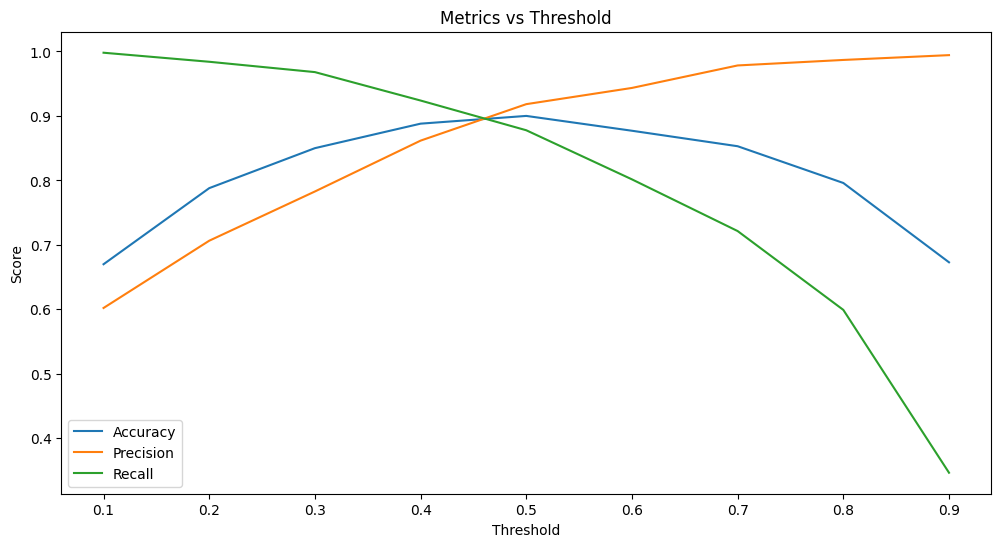

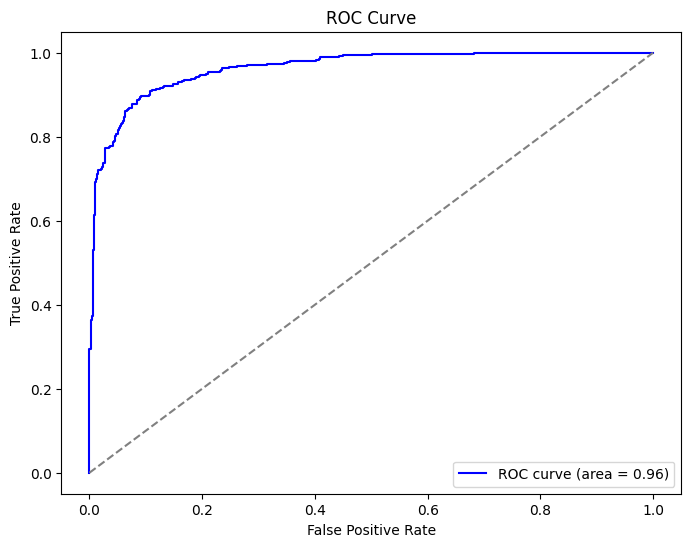


Метод: Nesterov


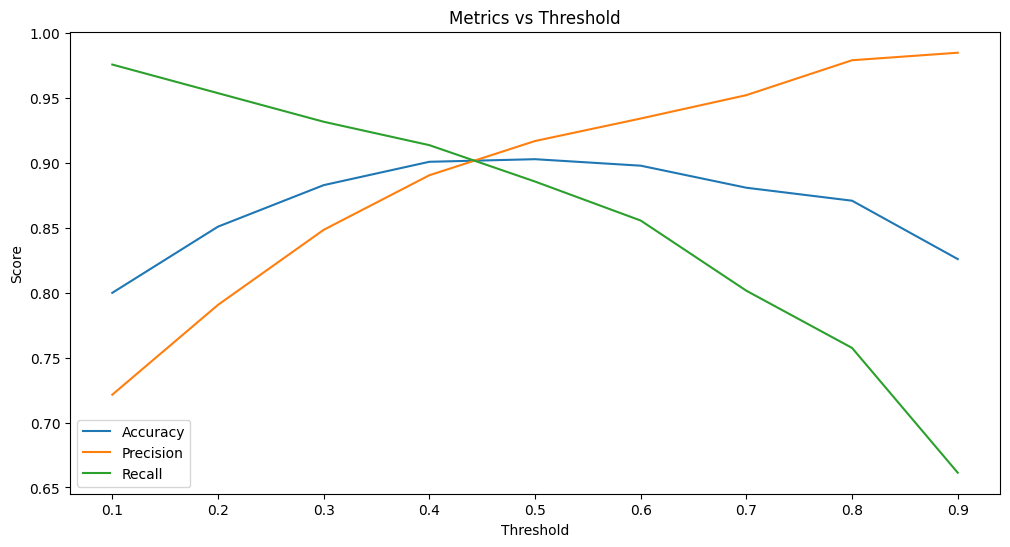

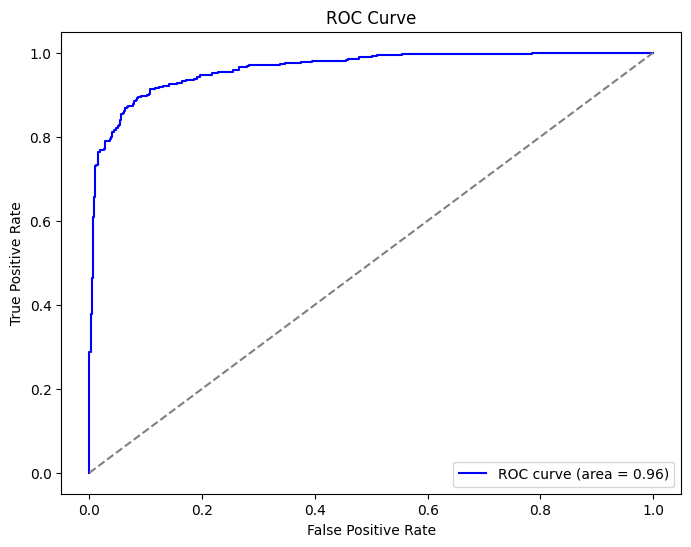


Метод: Rmsprop


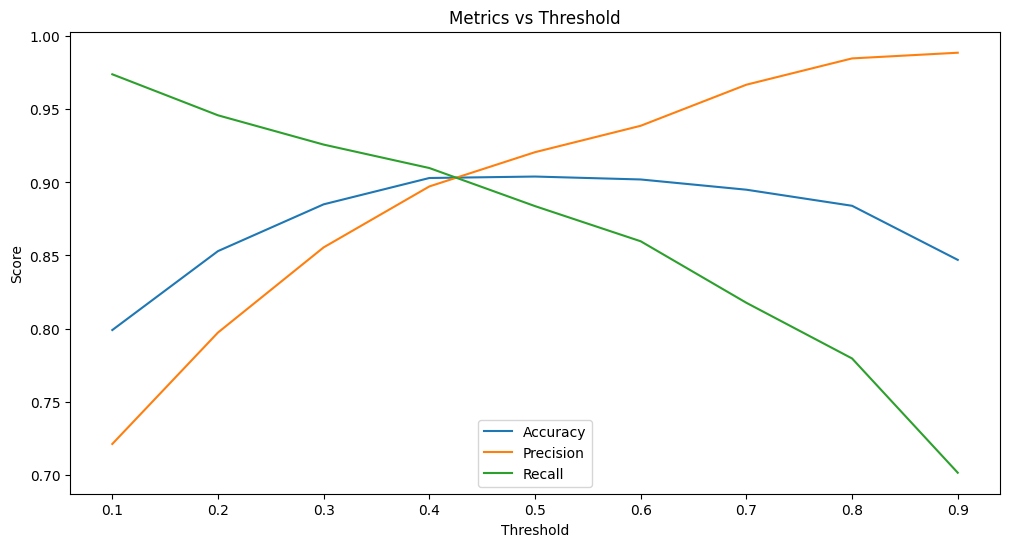

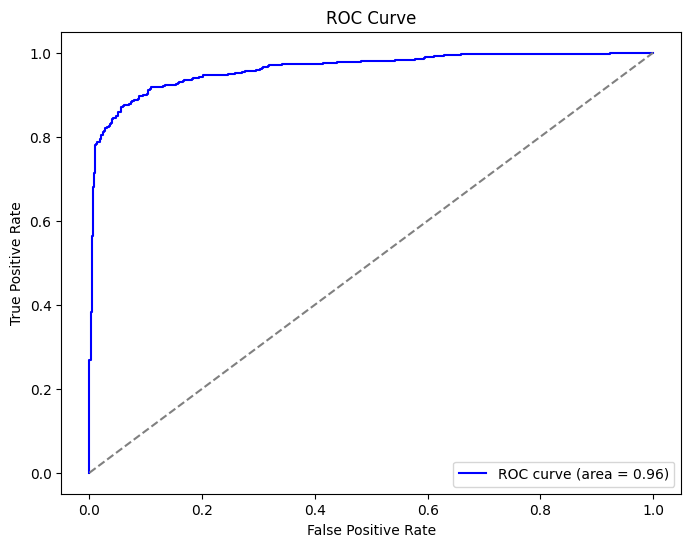

In [ ]:
# Обучение моделей с различными методами оптимизации и построение графиков
methods = ["standard", "nesterov", "rmsprop"]
for method in methods:
    model = LogisticRegression(learning_rate=0.01, epochs=1000, method=method)
    model.fit(X, y)
    print(f"\nМетод: {method.capitalize()}")
    plot_metrics(model, X, y)